# Introduction

In this particular kernel, we will be exploring the Iris dataset that will contain the various values of petal length,width alongwith sepal length,width. 

We shall be using the unsupervised learning method called KMeans clustering to label the various categories.


# Step 1: Importing libraries and data

In the first step, we shall move ahead with importing the relevant libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_iris=pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


As we can see, we have the various petal/sepal witdths and lengths. These are all classified into their species. Since we are performing unsupervised learning technique, hence we will not have the column of species usually to confirm if we have labelled our data correctly.


# Step 2: Data cleaning

Although our dataframe is extremely clean, we will try to refine the dataframe further more.

In the above datafram, the Id column is unnecessary and hence, we will drop it. More over, the word Iris has been repeated every time which provides no extra info. Hence, we will try to remove the iris word from the Species column.

In [3]:
df_iris.drop('Id',axis=1,inplace=True)


In [6]:
df_split=df_iris['Species'].str.rsplit('-',expand=True)
df_iris.drop('Species',axis=1,inplace=True)

In [12]:
df_iris['Species']=df_split.iloc[:,-1]
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


As we can see, we have completely refined our data and can move forward with the KMeans clustering.

# Step 3: Performing unsupervised learning


In this section, we will be trying to label entries based on their dimensions. Let us first segregate the Species label since tehnically we shouldn't have this information with us to perform the clustering.



In [16]:
df_labels=df_iris['Species']
df_iris.drop('Species',axis=1,inplace=True)

In [21]:
from sklearn.cluster import KMeans

We are now supposed to find the optimum number of clusters that give us a good idea of the separate labels that must be applied.

For this purpose, we use the famous **Elbow technique** that tells us how the Within Cluster sum of squares change. We want this value to be low which basically means that our centroid is now stable at a particular location. Let us perform this task.

We will try to check the WCSS values for a range of K number of clusters between 1-15.

In [24]:
wcss=[]
clusters=np.arange(1,16)
X=df_iris.values
for i in range(1,16):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

Great ! So we have fitted our clusters ranging from K=1 to K=15. Let us plot the elbow diagram that will give us a clear idea of which K value is optimum for our analysis.

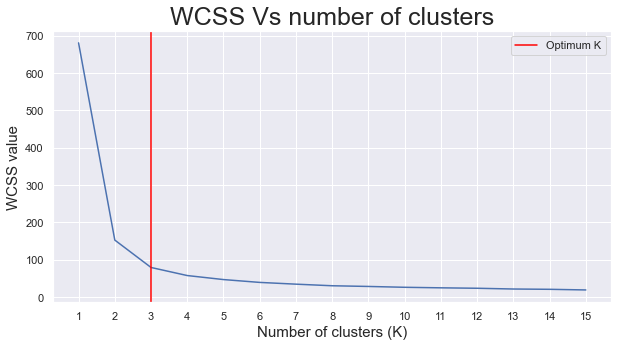

In [37]:
sns.set()
plt.figure(figsize=(10,5))
plt.title('WCSS Vs number of clusters',size=25)
plt.plot(clusters,wcss)
plt.axvline(3,color='red',label='Optimum K')
plt.xticks(np.arange(1,16))
plt.xlabel('Number of clusters (K)',size=15)
plt.ylabel('WCSS value',size=15)
plt.legend()

From the above elbow diagram, we see that the second bend on the diagram is at K=3. According to this analysis, K=3 should give us good results. This makes sense since in actual case, we have 3 unique species that we are gonna classify.


## 3 cluster solution

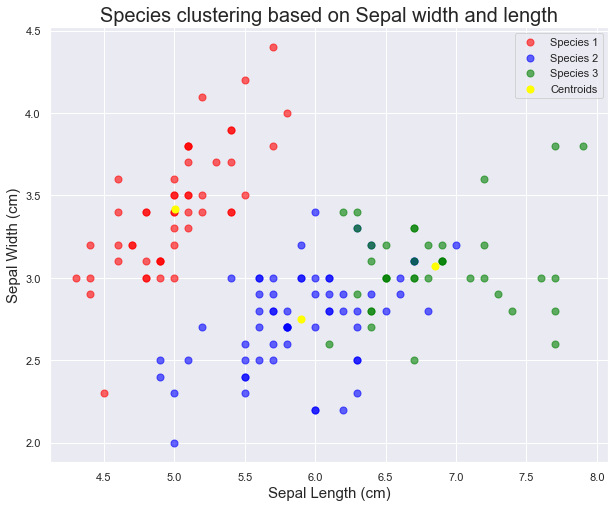

In [75]:
K=3
kmeans=KMeans(n_clusters=K)
kmeans.fit(X)
labels=kmeans.predict(X)
df_iris['Label']=labels

df_a=df_iris[df_iris['Label']==0]
df_b=df_iris[df_iris['Label']==1]
df_c=df_iris[df_iris['Label']==2]

plt.figure(figsize=(10,8))
plt.title('Species clustering based on Sepal width and length',size=20)

plt.scatter(df_a.iloc[:,0],df_a.iloc[:,1],c='red',s=50,alpha=0.6,label='Species 1')
plt.scatter(df_b.iloc[:,0],df_b.iloc[:,1],c='blue',s=50,alpha=0.6,label='Species 2')
plt.scatter(df_c.iloc[:,0],df_c.iloc[:,1],c='green',s=50,alpha=0.6,label='Species 3')

plt.xlabel('Sepal Length (cm)',size=15)
plt.ylabel('Sepal Width (cm)',size=15)


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')



plt.legend()

Let us now perform the same for Petal length and width.

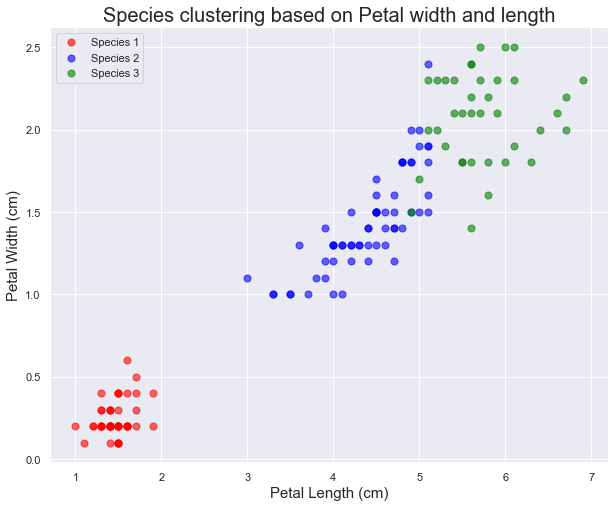

In [52]:
plt.figure(figsize=(10,8))
plt.title('Species clustering based on Petal width and length',size=20)

plt.scatter(df_a.iloc[:,2],df_a.iloc[:,3],c='red',s=50,alpha=0.6,label='Species 1')
plt.scatter(df_b.iloc[:,2],df_b.iloc[:,3],c='blue',s=50,alpha=0.6,label='Species 2')
plt.scatter(df_c.iloc[:,2],df_c.iloc[:,3],c='green',s=50,alpha=0.6,label='Species 3')

plt.xlabel('Petal Length (cm)',size=15)
plt.ylabel('Petal Width (cm)',size=15)

plt.legend()

It is seen that there seems to be a far more distinction between petal length and width when compared to sepal length and width.

## Actual solution based on labels provided

Let us make the required scatter plot based on labels given to us. This will help us confirm if our cluster solution is correct.

In [53]:
df_iris['Species']=df_labels

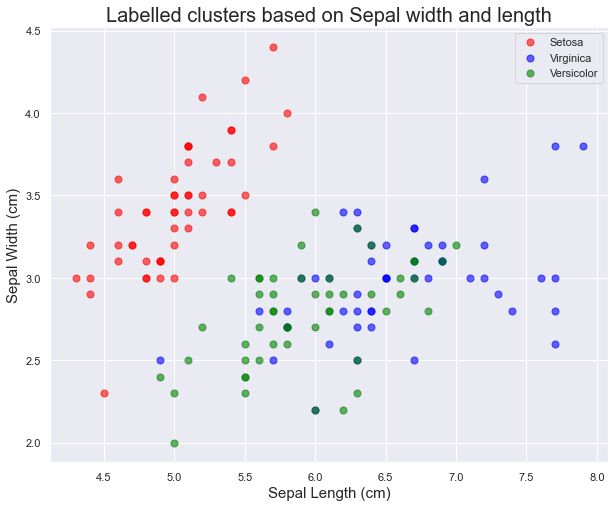

In [63]:
df_setosa=df_iris[df_iris['Species']=='setosa']
df_virginica=df_iris[df_iris['Species']=='virginica']
df_versicolor=df_iris[df_iris['Species']=='versicolor']




plt.figure(figsize=(10,8))
plt.title('Labelled clusters based on Sepal width and length',size=20)

plt.scatter(df_setosa.iloc[:,0],df_setosa.iloc[:,1],c='red',s=50,alpha=0.6,label='Setosa')
plt.scatter(df_virginica.iloc[:,0],df_virginica.iloc[:,1],c='blue',s=50,alpha=0.6,label='Virginica')
plt.scatter(df_versicolor.iloc[:,0],df_versicolor.iloc[:,1],c='green',s=50,alpha=0.6,label='Versicolor')

plt.xlabel('Sepal Length (cm)',size=15)
plt.ylabel('Sepal Width (cm)',size=15)

plt.legend()

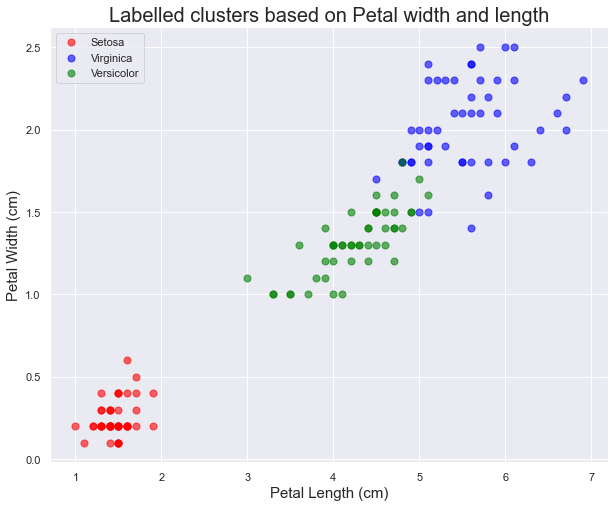

In [64]:
plt.figure(figsize=(10,8))
plt.title('Labelled clusters based on Petal width and length',size=20)

plt.scatter(df_setosa.iloc[:,2],df_setosa.iloc[:,3],c='red',s=50,alpha=0.6,label='Setosa')
plt.scatter(df_virginica.iloc[:,2],df_virginica.iloc[:,3],c='blue',s=50,alpha=0.6,label='Virginica')
plt.scatter(df_versicolor.iloc[:,2],df_versicolor.iloc[:,3],c='green',s=50,alpha=0.6,label='Versicolor')

plt.xlabel('Petal Length (cm)',size=15)
plt.ylabel('Petal Width (cm)',size=15)

plt.legend()

# Conclusion

As we can see, using KMeans clustering, we could label most of the clusters correctly. Some of the points couldn't be classified correctly. However, majority of the points could be segmented accurately. Hence, unsupervised learning such as KMeans can be really beneficial when we don't have the labels with us to check the accuracy of our answers.

Just for a quick go through, let us check the scatterplots once more.

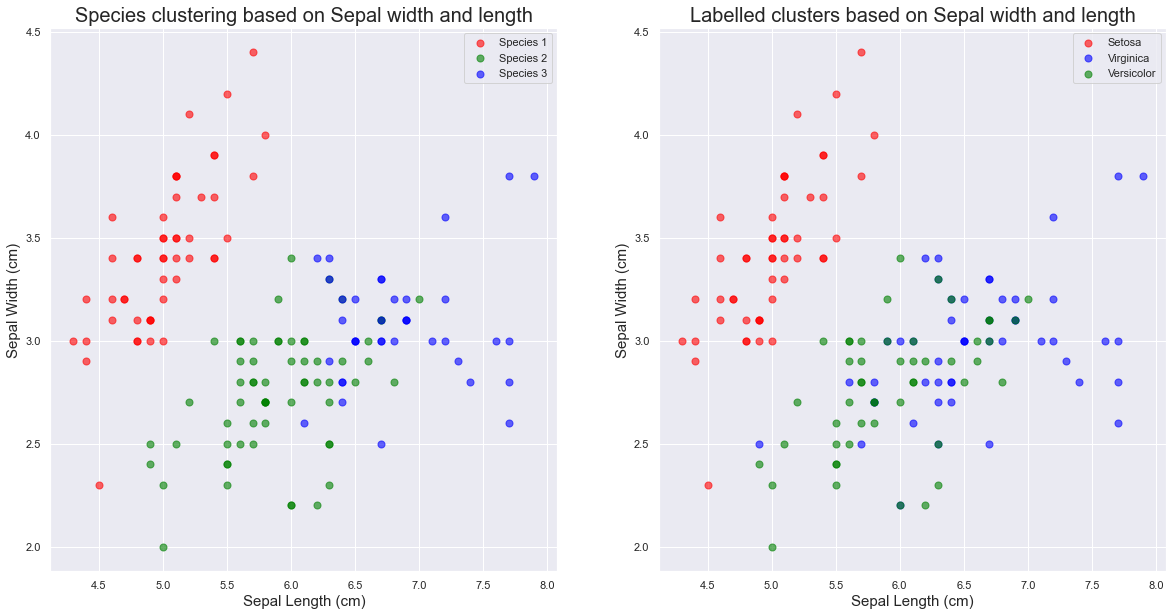

In [73]:
fig=plt.figure(figsize=(20,10))

ax1=fig.add_subplot(121)

ax1.set_title('Species clustering based on Sepal width and length',size=20)

ax1.scatter(df_a.iloc[:,0],df_a.iloc[:,1],c='red',s=50,alpha=0.6,label='Species 1')
ax1.scatter(df_b.iloc[:,0],df_b.iloc[:,1],c='green',s=50,alpha=0.6,label='Species 2')
ax1.scatter(df_c.iloc[:,0],df_c.iloc[:,1],c='blue',s=50,alpha=0.6,label='Species 3')

ax1.set_xlabel('Sepal Length (cm)',size=15)
ax1.set_ylabel('Sepal Width (cm)',size=15)

ax1.legend()


ax2=fig.add_subplot(122)
ax2.set_title('Labelled clusters based on Sepal width and length',size=20)

ax2.scatter(df_setosa.iloc[:,0],df_setosa.iloc[:,1],c='red',s=50,alpha=0.6,label='Setosa')
ax2.scatter(df_virginica.iloc[:,0],df_virginica.iloc[:,1],c='blue',s=50,alpha=0.6,label='Virginica')
ax2.scatter(df_versicolor.iloc[:,0],df_versicolor.iloc[:,1],c='green',s=50,alpha=0.6,label='Versicolor')

ax2.set_xlabel('Sepal Length (cm)',size=15)
ax2.set_ylabel('Sepal Width (cm)',size=15)

ax2.legend()

As confirmed already, on the left, we have the KMeans unsupervised learning results while on the right, we have the actual labelled flowers. We can see that there is an extreme degree of similarity between the two graphs. This means a K=3 cluster performed really well for our unsupervised classification.